In [121]:
from fenics import *
import matplotlib.pyplot as plt
import numpy as np

Considere la siguiente ecuacion de conveccion-difusion:
$$ \begin{cases} \frac{\partial u}{\partial t} + v \cdot \nabla u = D \nabla^2 u, &\text{ con }x\in\Omega \\ 
u(t,x,y) = 0,&\text{ con }x\in\partial\Omega\\
u(0, x, y) = \sin{(\pi x)} \cdot \sin{(\pi y)} \end{cases}$$

En donde $D \in \mathbb{R}$ y $v \in \mathbb{R}^2$, ademas:
- $v \cdot \nabla u $: es el termino de transporte
- $D \nabla^2 u$: es el termino de difusion

Sea $D = 0.1$ y $v = (1, 1)^T$. La formula variacional esta dada por:
$$ \frac{u^k - u^{k-1}}{dt} = D \nabla^2 u^k - v \cdot \nabla u^k $$
$$ u^k - u^{k-1} = dt (D \nabla^2 u^k - v \cdot \nabla u^k)$$
$$ \int_{\Omega} (u^k - u^{k-1})w \, dx = dt \int_{\Omega} (D \nabla^2 u^k - v \cdot \nabla u^k)w \, dx $$
$$ \int_{\Omega} w u^k - w u^{k-1} \, dx = dt \int_{\Omega} D \nabla^2 u^k w - (v \cdot \nabla u^k)w \, dx$$
Aplicando teorema de Green en la primera parte de la derecha obtenemos que:
$$ \int_{\Omega} D \nabla^2 u^k w \, dx = - D \int_{\Omega} \nabla u^k \cdot \nabla w \, dx + \int_{\partial \Omega} \frac{\partial u^k}{\partial \eta} w \, dS$$
Pero el ultimo termino es 0 pues $w$ se anula en la frontera, entonces:
$$ \int_{\Omega} D \nabla^2 u^k w \, dx = -dt \int_{\Omega} D \nabla u^k \cdot \nabla w + (v \cdot \nabla u^k)w \, dx $$
$$ \int_{\Omega} (u^k + dt(v \cdot \nabla u^k))w + dt D \nabla u^k \cdot \nabla w \, dx = \int_{\Omega} w u^{k-1} \, dx $$

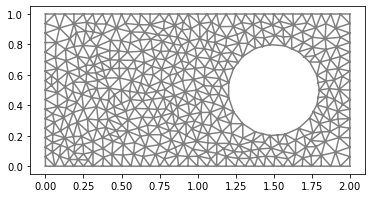

In [122]:
from mshr import *
# Define mesh and function space
domain = Rectangle(Point(0, 0), Point(2, 1)) - Circle(Point(1.5, 0.5), 0.3)
mesh = generate_mesh(domain, 20)
plot(mesh)

In [123]:
fid = File("Convec_Diff/solution.pvd")

#Discretization
T = 1.0 # final time
num_steps = 50 # number of time steps
dt = T / num_steps # time step size

# Define mesh and function space
nx = ny = 20
#mesh = IntervalMesh(200, 0, np.pi)
#mesh = UnitSquareMesh(nx, ny)

V = FunctionSpace(mesh, 'Lagrange', 1)

## Define the boundary condition
u_D = Constant(0.0)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

/home/suribe06/mambaforge/envs/fenicsmshr/lib/python3.8/site-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'label'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


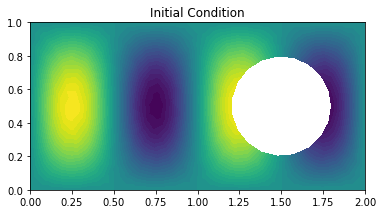

In [124]:
# The initial condition, u(t=0, x, y) = sin(pi * x) * sin(pi * y)
initial_condition = Expression("sin(3.141 * x[0] * 2) * sin(3.141 * x[1] )",degree=1)
u_old = interpolate(initial_condition,V)
plt.figure()
plt.title('Initial Condition')
plot(u_old, label="t=0.0")


Solving linear variational problem.
time = 0.02: error = 0.955
Solving linear variational problem.
time = 0.04: error = 0.278
Solving linear variational problem.
time = 0.06: error = 0.169
Solving linear variational problem.
time = 0.08: error = 0.142
Solving linear variational problem.
time = 0.10: error = 0.152
Solving linear variational problem.
time = 0.12: error = 0.159
Solving linear variational problem.
time = 0.14: error = 0.162
Solving linear variational problem.
time = 0.16: error = 0.162
Solving linear variational problem.
time = 0.18: error = 0.159
Solving linear variational problem.
time = 0.20: error = 0.154
Solving linear variational problem.
time = 0.22: error = 0.146
Solving linear variational problem.
time = 0.24: error = 0.136
Solving linear variational problem.
time = 0.26: error = 0.124
Solving linear variational problem.
time = 0.28: error = 0.114
Solving linear variational problem.
time = 0.30: error = 0.101
Solving linear variational problem.
time = 0.32: error 

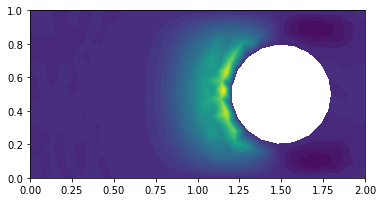

In [125]:
# Define the variational problem
D = Constant(0.01)
v = Expression(('1.0','0.0'), degree = 1)
u = TrialFunction(V)
w = TestFunction(V)

a = ((u + dt * inner(v, nabla_grad(u))) * w + dt * D * inner(nabla_grad(u), nabla_grad(w))) * dx
L = w * u_old * dx

# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    u_old.t = t
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    plot(u)
    # Compute error at vertices
    u_e = interpolate(u_old, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('time = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_old.assign(u)
    # Save solution through time to visualize in paraview
    fid << u, t


### Tarea
Tomando en cuenta la condicion de frontera $ \frac{\partial u}{\partial \eta} $ para $x \in \Gamma_N = \{ x : x = 0 \}$, la formula variacional estaria dada por:
$$ \int_{\Omega} (u^k + dt(v \cdot \nabla u^k))w + dt D \nabla u^k \cdot \nabla w \, dx = \int_{\Omega} w u^{k-1} \, dx + \int_{\Gamma_N} w \, dS $$

In [136]:
def sigmoid(x, k=-10, a=1):
    return 1 / (1 + np.exp(-k * (x - a))) 

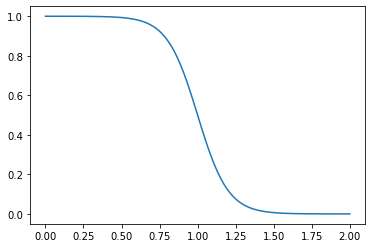

In [137]:
x = np.linspace(0, 2, 100)
y = sigmoid(x)
plt.plot(x, y)

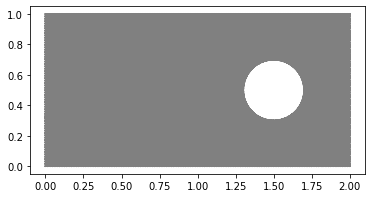

In [138]:
from mshr import *
# Define mesh and function space
domain = Rectangle(Point(0, 0), Point(2, 1)) - Circle(Point(1.5, 0.5), 0.2)
mesh = generate_mesh(domain,100)
plot(mesh)

In [139]:
fid = File("Convec_Diff/solution2.pvd")

# Discretization
T = 3.0 # final time
num_steps = 500 # number of time steps
dt = T / num_steps # time step size

# Define mesh and function space
V = FunctionSpace(mesh, 'Lagrange', 1)

# Define the boundary condition
u_D = Constant(0.0)
u_N = Constant(1.0)

def circle_boundary(x, on_boundary):
    return on_boundary and near(((x[0] - 1.5)**2 + (x[1] - 0.5)**2), 0.2, 5e-2)
def top_boundary(x, on_boundary):
    return on_boundary and near(x[1], 1)
def bottom_boundary(x, on_boundary):
    return on_boundary and near(x[1], 0)
def right_boundary(x, on_boundary):
    return on_boundary and near(x[0], 2)

circle_bc = DirichletBC(V, u_D, circle_boundary)
top_bc = DirichletBC(V, u_D, top_boundary)
bottom_bc = DirichletBC(V, u_D, bottom_boundary)
right_bc = DirichletBC(V, u_D, right_boundary)
boundaries = [circle_bc, top_bc, bottom_bc, right_bc]

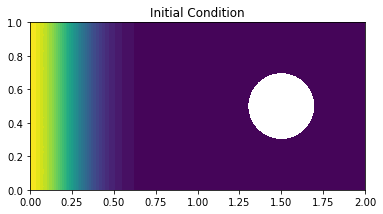

In [140]:
# Initial condition
initial_condition = Expression("1 / ( 1 + exp( -k * (x[0] - a)) )", k=-10, a=0.25 ,degree=1)
u_old = interpolate(initial_condition,V)
plt.figure()
plt.title('Initial Condition')
plot(u_old)

Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.01: error = 1.06
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.01: error = 0.782
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.02: error = 0.706
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.02: error = 0.669
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.03: error = 0.648
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.04: error = 0.634
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.04: error = 0.625
Solving linear variational problem.
  *** Warning: Found no fac

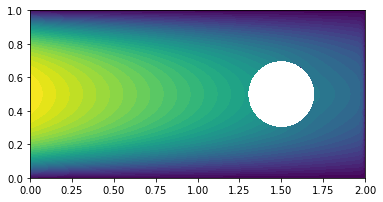

In [141]:
# Define the variational problem
D = Constant(0.01)
v = Expression(('1.0','0.0'), degree = 1)
u = TrialFunction(V)
w = TestFunction(V)

a = ((u + dt * inner(v, nabla_grad(u))) * w + dt * D * inner(nabla_grad(u), nabla_grad(w))) * dx
L = w*u_old*dx + dt*u_N*w*ds

# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    u_old.t = t
    # Solve variational problem at current time step
    solve(a == L, u, boundaries)
    # Plot solution
    plot(u)
    # Compute error at vertices
    u_e = interpolate(u_old, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('time = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_old.assign(u)
    # Save solution through time to visualize in paraview
    fid << u, t
